In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
sys.path.append("..") 

In [3]:
import OpsUtils

In [4]:
client = OpsUtils.my_ib.Connect_to_MYIB("Trading Account", 4001).my_ib()

Connections Parameters 
Host: 127.0.0.1 Port : 4001 Client ID : 9 Read Only : True Account : U5909643 Timeout : 10 


In [5]:
stk = OpsUtils.stocks.USStock("MSFT", client, "NASDAQ")

Created new instance of US Stock : MSFT


In [7]:
stk.last_price()

448.95

In [10]:
details, long_name = stk.USStock_Details()
print(details[0].marketName)
print(long_name)

NMS
MICROSOFT CORP


In [11]:
#import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


In [12]:
import datetime
import pytz
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.ticker as mpticker
import pandas
import numpy
import mplfinance as mpf

In [14]:
#style.available

In [20]:
data = stk.USStock_hist_data("1 D", "1 min")
display(data.tail())
#pd.read_parquet("../data/AAPL_1min_5D_hist.parquet")

,date,open,high,low,close,volume,average,barCount
date,,,,,,,,
2024-06-17 15:55:00-04:00,2024-06-17 15:55:00-04:00,448.95,449.00,448.25,448.53,112744.0,448.534,607
2024-06-17 15:56:00-04:00,2024-06-17 15:56:00-04:00,448.50,448.67,448.30,448.47,97831.0,448.504,700
2024-06-17 15:57:00-04:00,2024-06-17 15:57:00-04:00,448.46,448.48,448.08,448.42,105613.0,448.289,765
2024-06-17 15:58:00-04:00,2024-06-17 15:58:00-04:00,448.39,448.53,448.25,448.30,146204.0,448.344,854
2024-06-17 15:59:00-04:00,2024-06-17 15:59:00-04:00,448.31,448.78,448.25,448.39,273190.0,448.387,1639


In [21]:
data.set_index('date', inplace=True, drop=False)

In [22]:
data['close'].describe()

count    390.000000
mean     446.150385
std        2.925644
min      440.850000
25%      443.270000
50%      445.740000
75%      448.985000
max      450.840000
Name: close, dtype: float64

In [29]:
(data.max() - data.min()) 

SyntaxError: invalid syntax (948412866.py, line 1)

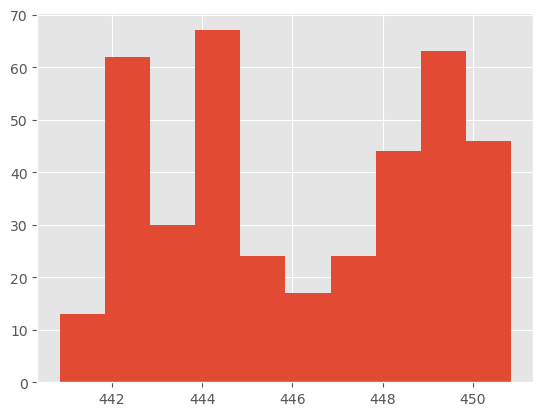

In [24]:
data2 = data.between_time("09:30", "16:00")['close'].groupby(data['date'].dt.day)
for name, group in data2:
    #@print(name)
    group.hist(bins=10)
    plt.show()
    
#@data2.hist(bins=20)

In [13]:
def plot_stock_data(data, symbol):
    start = data.index.min()
    end   = data.index.max()
    fig, ax = plt.subplots()
    ax1 = plt.subplot2grid((5,1), (0,0), rowspan=4)
    ax2 = plt.subplot2grid((5,1), (4,0), sharex=ax1)

    ax1.set_title("{} - {}".format(symbol, start))
    ax1.set_facecolor("#131722")
    ax1.xaxis.set_major_formatter(mpticker.FuncFormatter(mydate))

    candlestick_ohlc(ax1, data.to_numpy(), width=8, colorup='#77d879', colordown='#db3f3f')

    ax2.bar(data['date'], data['volume'], width=30)
    ax2.xaxis.set_major_formatter(mpticker.FuncFormatter(mydate))
    fig.subplots_adjust(hspace=0)
    fig.autofmt_xdate()
    return ax1

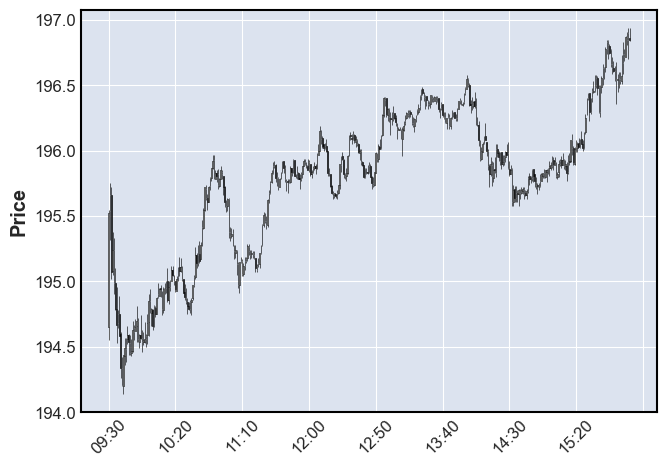

In [19]:
mpf.plot(data.between_time("09:30", "16:00").loc['2024-06-7'],type='candle')

In [20]:
def get_optimum_clusters(df, saturation_point=0.05):
    '''

    :param df: dataframe
    :param saturation_point: The amount of difference we are willing to detect
    :return: clusters with optimum K centers

    This method uses elbow method to find the optimum number of K clusters
    We initialize different K-means with 1..10 centers and compare the inertias
    If the difference is no more than saturation_point, we choose that as K and move on
    '''

    wcss = []
    k_models = []

    size = min(11, len(df.index))
    for i in range(1, size):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        k_models.append(kmeans)

    # Compare differences in inertias until it's no more than saturation_point
    optimum_k = len(wcss)-1
    for i in range(0, len(wcss)-1):
        diff = abs(wcss[i+1] - wcss[i])
        if diff < saturation_point:
            optimum_k = i
            break

    print("Optimum K is " + str(optimum_k + 1))
    optimum_clusters = k_models[optimum_k]

    return optimum_clusters


In [25]:
data['close'].reset_index()

,date,close
0,2024-06-03 04:00:00-04:00,192.77
1,2024-06-03 04:01:00-04:00,192.69
2,2024-06-03 04:02:00-04:00,192.70
3,2024-06-03 04:03:00-04:00,192.74
4,2024-06-03 04:04:00-04:00,193.00
...,...,...
4567,2024-06-07 16:10:00-04:00,196.79
4568,2024-06-07 16:11:00-04:00,196.79
4569,2024-06-07 16:12:00-04:00,196.80
4570,2024-06-07 16:13:00-04:00,196.80


In [39]:
df = data['close'].reset_index().drop(columns=['date'])
d
display(df.tail())
plt.scatter(data['close'].reset_index().drop(columns=['date']).iloc[:,0], data['close'].reset_index().drop(columns=['date']).iloc[:,1])
plt.show()

,close
4567,196.79
4568,196.79
4569,196.80
4570,196.80
4571,196.80


IndexError: single positional indexer is out-of-bounds

In [31]:
get_optimum_clusters(data['close'].reset_index().drop(columns=['date']))

Optimum K is 10


KMeans(n_clusters=10, n_init=10, random_state=0)